In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
|---|---|
|:---:|:

SyntaxError: invalid syntax (<ipython-input-4-f9e4d963392a>, line 1)

In [16]:
# read Survey 

df1 = pd.read_excel('../data/Post-pandemic_travel_lodging-1.xlsx', head = None )
print(df1.shape)
df1.head(1)

(32, 23)


,Timestamp,What is your age?,What is your home zip code?,"When you hear the term ""bed and breakfast"", what comes to mind?",How often do you usually travel?,What type of lodging do you most often stay at when you travel?,Why do you typically choose that lodging option?,Who do you usually travel with?,How many people do you travel with?,"How do you typically find places to stay at while traveling? Please rank from 1-4, with 4 being the method you rely on most. [Recommendations from friends/family]",...,Do you prefer to use an app or website when booking your travel accommodations?,"When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Tours and excursions]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Food/Restaurants/Bars]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Relaxation]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Shopping]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Meeting new people]","When you book a vacation, what matters to you? Please rank from 1-6, with 6 being most important. [Immersing yourself in a new place]",Have you travelled during the pandemic?,"If you travelled during the pandemic, what type of lodging did you stay at and why?","If you travelled during the pandemic, did you have any concerns or difficulties during your stay in relation to COVID? If so, what were they?"
0,2021-03-23 15:38:11.493,34.0,10514.0,Charming vacation,2,Hotel,Experience. Know what to expect,With family,3-4 people,1,...,Website,6,4,3,1,2,5,Yes,Hotel for ease/safe,No


In [17]:
# View all column names

df1.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Timestamp,2021-03-23 15:38:11.493000,2021-03-23 15:40:28.494000,2021-03-23 15:41:27.211000,2021-03-23 15:41:52.435000,2021-03-23 15:42:36.842000,2021-03-23 15:43:05.047000,2021-03-23 15:43:18.448000,2021-03-23 15:44:22.513000,2021-03-23 15:45:18.806000,2021-03-23 15:45:42.216000,...,2021-03-23 17:00:30.561000,2021-03-23 17:55:15.672000,2021-03-23 18:28:27.486000,2021-03-23 18:56:51.489000,2021-03-23 19:02:34.863000,2021-03-23 22:36:43.227000,2021-03-24 02:03:19.911000,2021-03-24 13:17:50.078000,2021-03-24 17:01:27.731000,2021-03-24 17:05:00.884000
What is your age?,34,53,30,58,23,36,33,24,23,27,...,18,24,23,20,24,41,25,42,NaN,25
What is your home zip code?,10514,60611,60605,60611,1605,20024,60605,78741,78751,11370,...,60609,78705,77058,33428,78628,11238,75074,11205,NaN,94530
"When you hear the term ""bed and breakfast"", what comes to mind?",Charming vacation,Tea and bread,"Motel, AirBnb, cozy lodging in countryside","inexpensive lodging, comfort of home away from...",Homey,Quaint vacation lodging,Small family-owned vacation home,"Small, quaint hotel with breakfast",A hotel,Cabin,...,travel,Place to stay overnight that is quaint and has...,A hotel,A hotel or inn that serves complimentary break...,Romantic partners going on some sort of getawa...,Countryside,Cute,Old Victorian house with lots of old people an...,basic room with basic breakfast in a dining ro...,small quaint hotel/motel that has food include...
How often do you usually travel?,2,1,2,1,1,2,3,2,2,2,...,1,2,1,2,2,2,3,2,3,3
What type of lodging do you most often stay at when you travel?,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,AirBnb,AirBnb,...,Hotel,Hotel,Family,AirBnb,AirBnb,Hotel and local inn,Hotel,AirBnb,Hotel,AirBnb
Why do you typically choose that lodging option?,Experience. Know what to expect,"Free parking, breakfast included","Easiest option to book without research, can u...","location, proximity to places of interest, ame...",Convenience,Consistent quality/features,Big hotel chains are easy to find and expense ...,"Not sketchy, rewards points, free breakfast",It’s cheaper and there’s more options,Feels more homey,...,"Safest, most credible",More availability and usually more cost effici...,It is inexpensive,It can be way cheeper for being able to have a...,"It’s a pretty safe option, plus there’s usuall...",Depends on the desitination,Facilities,Depends on where I am going. I like to have a...,I prefer to have as many amenities available,I don't like being around a bunch of tourists ...
Who do you usually travel with?,With family,With family,With family,"By myself, With friends, With family, With kids",With family,with partner,By myself,"With friends, With family","With friends, With family",With family,...,"By myself, With friends, With family","With friends, With family",With family,With friends,With friends,"By myself, With friends, With family",With family,"By myself, With friends, With family","By myself, With friends","With friends, With family, with S.O."
How many people do you travel with?,3-4 people,1-2 people,1-2 people,3-4 people,1-2 people,1-2 people,None,3-4 people,1-2 people,1-2 people,...,3-4 people,3-4 people,1-2 people,1-2 people,3-4 people,1-2 people,3-4 people,1-2 people,1-2 people,1-2 people
"How do you typically find places to stay at while traveling? Please rank from 1-4, with 4 being the method you rely on most. [Recommendations from friends/family]",1,2,3,2,2,2,2,3,1,2,...,1,3,3,2,1,4,4,3,1,1


In [18]:
# Rename columns 

df1.columns = ['timestamp', 'age', 'zipcode', 'term_bnb', 'trav_per_year',
               'type_lodging', 'why_lodging', 'who_travel', 'num_people', 
              'find_rec', 'find_social', 'find_google', 'find_online', 
              'app_website', 'matters_tours', 'matters_food', 'matters_relax',
               'matters_shopping', 'matters_meeting' , 'matter_immersing',
              'covid_travel', 'covid_lodging', 'covid_issues']
    

In [19]:
# Reset index 

df1.reset_index(inplace = True)

In [20]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
index,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
timestamp,2021-03-23 15:38:11.493000,2021-03-23 15:40:28.494000,2021-03-23 15:41:27.211000,2021-03-23 15:41:52.435000,2021-03-23 15:42:36.842000,2021-03-23 15:43:05.047000,2021-03-23 15:43:18.448000,2021-03-23 15:44:22.513000,2021-03-23 15:45:18.806000,2021-03-23 15:45:42.216000,...,2021-03-23 17:00:30.561000,2021-03-23 17:55:15.672000,2021-03-23 18:28:27.486000,2021-03-23 18:56:51.489000,2021-03-23 19:02:34.863000,2021-03-23 22:36:43.227000,2021-03-24 02:03:19.911000,2021-03-24 13:17:50.078000,2021-03-24 17:01:27.731000,2021-03-24 17:05:00.884000
age,34,53,30,58,23,36,33,24,23,27,...,18,24,23,20,24,41,25,42,NaN,25
zipcode,10514,60611,60605,60611,1605,20024,60605,78741,78751,11370,...,60609,78705,77058,33428,78628,11238,75074,11205,NaN,94530
term_bnb,Charming vacation,Tea and bread,"Motel, AirBnb, cozy lodging in countryside","inexpensive lodging, comfort of home away from...",Homey,Quaint vacation lodging,Small family-owned vacation home,"Small, quaint hotel with breakfast",A hotel,Cabin,...,travel,Place to stay overnight that is quaint and has...,A hotel,A hotel or inn that serves complimentary break...,Romantic partners going on some sort of getawa...,Countryside,Cute,Old Victorian house with lots of old people an...,basic room with basic breakfast in a dining ro...,small quaint hotel/motel that has food include...
trav_per_year,2,1,2,1,1,2,3,2,2,2,...,1,2,1,2,2,2,3,2,3,3
type_lodging,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,Hotel,AirBnb,AirBnb,...,Hotel,Hotel,Family,AirBnb,AirBnb,Hotel and local inn,Hotel,AirBnb,Hotel,AirBnb
why_lodging,Experience. Know what to expect,"Free parking, breakfast included","Easiest option to book without research, can u...","location, proximity to places of interest, ame...",Convenience,Consistent quality/features,Big hotel chains are easy to find and expense ...,"Not sketchy, rewards points, free breakfast",It’s cheaper and there’s more options,Feels more homey,...,"Safest, most credible",More availability and usually more cost effici...,It is inexpensive,It can be way cheeper for being able to have a...,"It’s a pretty safe option, plus there’s usuall...",Depends on the desitination,Facilities,Depends on where I am going. I like to have a...,I prefer to have as many amenities available,I don't like being around a bunch of tourists ...
who_travel,With family,With family,With family,"By myself, With friends, With family, With kids",With family,with partner,By myself,"With friends, With family","With friends, With family",With family,...,"By myself, With friends, With family","With friends, With family",With family,With friends,With friends,"By myself, With friends, With family",With family,"By myself, With friends, With family","By myself, With friends","With friends, With family, with S.O."
num_people,3-4 people,1-2 people,1-2 people,3-4 people,1-2 people,1-2 people,None,3-4 people,1-2 people,1-2 people,...,3-4 people,3-4 people,1-2 people,1-2 people,3-4 people,1-2 people,3-4 people,1-2 people,1-2 people,1-2 people


In [55]:
df1['find_rec'].value_counts()

3    9
2    9
1    9
4    5
Name: find_rec, dtype: int64

ValueError: Length of values does not match length of index

In [63]:
places_df = df1[['find_rec','find_social','find_google','find_online']]
places_df.reset_index()

,index,find_rec,find_social,find_google,find_online
0,0,1,2,3,4
1,1,2,1,4,4
2,2,3,4,2,1
3,3,2,2,4,1
4,4,2,3,4,4
5,5,2,1,3,4
6,6,2,1,4,3
7,7,3,2,4,3
8,8,1,2,3,4
9,9,2,2,4,4


In [79]:
f  = places_df['find_rec'].value_counts()


In [78]:
type(df)

pandas.core.series.Series

In [42]:
places_df.groupby('find_rec').count()

,find_social,find_google,find_online
find_rec,,,
1,9,9,9
2,9,9,9
3,9,9,9
4,5,5,5


In [33]:
df1.to_csv('../clean_data/questionare.csv')

In [63]:
df1['matters_tours'].mean()

3.59375

In [64]:
df1['matters_food'].mean()

4.5625

In [65]:
df1['matters_relax'].mean()

4.1875

In [66]:
df1['matters_shopping'].mean()

2.5

In [67]:
df1['matters_meeting'].mean()

2.5

In [68]:
df1['matter_immersing'].mean()

4.8125

In [69]:
(a + b + c + d + e + f) / f

4.603896103896104

In [35]:
df1['term_bnb']

0                                    Charming vacation 
1                                         Tea and bread
2            Motel, AirBnb, cozy lodging in countryside
3     inexpensive lodging, comfort of home away from...
4                                                 Homey
5                               Quaint vacation lodging
6                      Small family-owned vacation home
7                   Small, quaint hotel with breakfast 
8                                               A hotel
9                                                 Cabin
10                                               AirBnB
11    Overnight accommodations which includes breakf...
12    Cute little place, family friendly, couples, g...
13      Relaxing amenities, cooked meals, quiet getaway
14    Everything AirBnB - Also corny country inns - ...
15    A small inn, locally owned. Definitely not a l...
16                                               AirBnB
17                                             A

In [41]:
df1['type_lodging'].value_counts(normalize=True)

Hotel                           0.50000
AirBnb                          0.34375
Family                          0.06250
Whatever is cheapest            0.03125
Hotel and local inn             0.03125
Split between Hotels and Air    0.03125
Name: type_lodging, dtype: float64

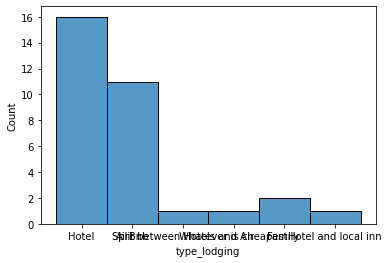

In [39]:
sns.histplot(data = df1,x ='type_lodging' pallet = )